# Artificial Intelligence exam project

Initial imports:

In [1]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
from utils import *

ModuleNotFoundError: No module named 'utils'

In [19]:
!python3 -m minihack.scripts.env_list 

MiniHack-Room-5x5-v0
MiniHack-Room-Random-5x5-v0
MiniHack-Room-Dark-5x5-v0
MiniHack-Room-Monster-5x5-v0
MiniHack-Room-Trap-5x5-v0
MiniHack-Room-Ultimate-5x5-v0
MiniHack-Room-15x15-v0
MiniHack-Room-Random-15x15-v0
MiniHack-Room-Dark-15x15-v0
MiniHack-Room-Monster-15x15-v0
MiniHack-Room-Trap-15x15-v0
MiniHack-Room-Ultimate-15x15-v0
MiniHack-Corridor-R2-v0
MiniHack-Corridor-R3-v0
MiniHack-Corridor-R5-v0
MiniHack-KeyRoom-Fixed-S5-v0
MiniHack-KeyRoom-S5-v0
MiniHack-KeyRoom-S15-v0
MiniHack-KeyRoom-Dark-S5-v0
MiniHack-KeyRoom-Dark-S15-v0
MiniHack-MazeWalk-9x9-v0
MiniHack-MazeWalk-Mapped-9x9-v0
MiniHack-MazeWalk-15x15-v0
MiniHack-MazeWalk-Mapped-15x15-v0
MiniHack-MazeWalk-45x19-v0
MiniHack-MazeWalk-Mapped-45x19-v0
MiniHack-CorridorBattle-v0
MiniHack-CorridorBattle-Dark-v0
MiniHack-MultiRoom-N2-v0
MiniHack-MultiRoom-N4-v0
MiniHack-MultiRoom-N6-v0
MiniHack-MultiRoom-N10-v0
MiniHack-MultiRoom-N6-OpenDoor-v0
MiniHack-MultiRoom-N10-OpenDoor-v0
MiniHack-MultiRoom-N2-Locked-v0
MiniHack-MultiRoom-N4-L

In [20]:
# create the environment
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0")
# reset it to initial state
state = env.reset()
# render the environment
env.render() 


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---     ----      ---                                                           
|.       ..        .|                                                           
|.......... ........|                                                           
|.      ... . .    .|                                                           
|.......... . ......|                                                           
|..      ..       ..|                                                           
|........>..... ....|                                                           
|..     ...   . . ..|                                                           
|.......... ..... ..|      

In [21]:
env.actions

(<CompassDirection.N: 107>,
 <CompassDirection.E: 108>,
 <CompassDirection.S: 106>,
 <CompassDirection.W: 104>,
 <CompassDirection.NE: 117>,
 <CompassDirection.SE: 110>,
 <CompassDirection.SW: 98>,
 <CompassDirection.NW: 121>,
 <Command.OPEN: 111>,
 <Command.KICK: 4>,
 <Command.SEARCH: 115>,
 <Command.EAT: 101>)

In [22]:
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render() 


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
----.-  ----      ---                                                           
|. ..    ..        .|                                                           
|.. ....... ........|                                                           
|..     ...   . .  .|                                                           
|.... ...>. . . ....|                                                           
|@. . .  .... .   ..|                                                           
|.. . ..... . . ....|                                                           
|.. .   ... .   . ..|                                                           
|.. ....... ..... ..|      

In [23]:
state['chars'].shape, state['pixel'].shape

((21, 79), (336, 1264, 3))

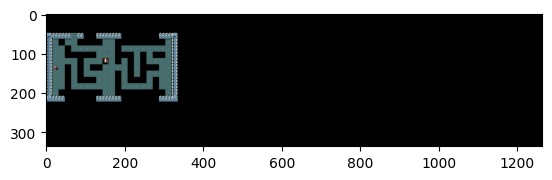

In [24]:
plt.imshow(state['pixel'])

In [29]:
pip install python-utils

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip list

Package                   Version
------------------------- ------------
absl-py                   2.0.0
anyio                     4.0.0
appnope                   0.1.3
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.0
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.13.0
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.1.0
cachetools                5.3.2
certifi                   2023.7.22
cffi                      1.16.0
charset-normalizer        3.3.0
cloudpickle               3.0.0
comm                      0.1.4
contourpy                 1.1.1
cycler                    0.12.1
debugpy                   1.8.0
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.1.3
executing                 2.0.0
fastjsonschema            2.18.1
flatbuffers        